# **User Defined Interval Discretizaation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## **User defined discretization with pandas**

First we need to determine the interval edges or limits.

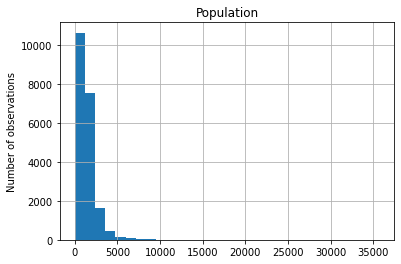

In [3]:
# let's plot a histogram to understand the
# variable's value range.
X["Population"].hist(bins=30)
plt.title("Population")
plt.ylabel("Number of observations")
plt.show()

In [4]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 200, 500, 1000, 2000, np.Inf]

# bin labels - we will use with pandas cut()
labels = ["0-200", "200-500", "500-1000", "1000-2000", ">2000"]

In [5]:
# discretize variable: use labels for the intervals
X["Population_range"] = pd.cut(
    X["Population"],
    bins=intervals,
    labels=labels,
    include_lowest=True,
)

# discretize variable: use interval limits
X["Population_limits"] = pd.cut(
    X["Population"], bins=intervals, labels=None, include_lowest=True
)

# plot the original and 2 versions of the discretized variable
X[["Population", "Population_range", "Population_limits"]].head()

,Population,Population_range,Population_limits
0,322.0,200-500,"(200.0, 500.0]"
1,2401.0,>2000,"(2000.0, inf]"
2,496.0,200-500,"(200.0, 500.0]"
3,558.0,500-1000,"(500.0, 1000.0]"
4,565.0,500-1000,"(500.0, 1000.0]"


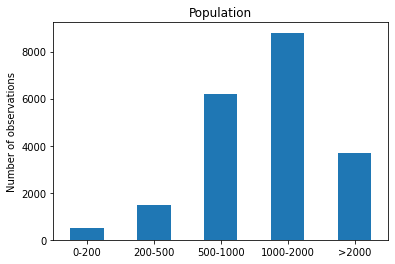

In [6]:
# let's check the number of observations per bin
X["Population_range"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Number of observations")
plt.title("Population")
plt.show()

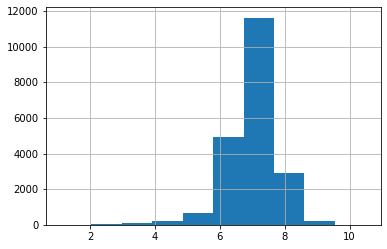

In [7]:
# Let's transform the variable with the logarithm
X["log_population"] = np.log(X["Population"])

# and plot a histogram to assess the transformation
X["log_population"].hist()

In [8]:
# Now let's find the equal-width interval limits
min_value = int(X["log_population"].min())
max_value = int(X["log_population"].max())

width = int(np.round((max_value - min_value) / 5))
log_intervals = [i for i in range(min_value, max_value + width, width)]
log_intervals

[1, 3, 5, 7, 9, 11]

In [9]:
# let's now find the cut-points
np.round(np.exp(log_intervals), 0)

array([3.0000e+00, 2.0000e+01, 1.4800e+02, 1.0970e+03, 8.1030e+03,
       5.9874e+04])

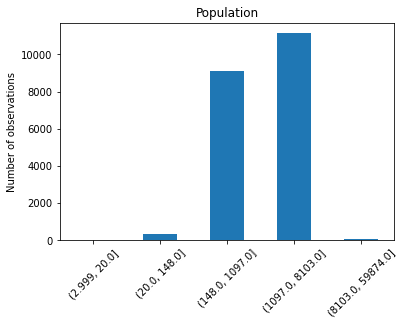

In [10]:
X["Population_range"] = pd.cut(
    X["Population"],
    bins=np.round(np.exp(log_intervals), 0),
    labels=None,
    include_lowest=True,
)

X["Population_range"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=45)
plt.ylabel("Number of observations")
plt.title("Population")
plt.show()

## **User defined discretization with Feature-engine**

In [11]:
pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 25.2 MB/s 
     |████████████████████████████████| 9.8 MB 68.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [12]:
from feature_engine.discretisation import ArbitraryDiscretiser

In [13]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [14]:
discretizer = ArbitraryDiscretiser(
    binning_dict={"Population": intervals},
    return_boundaries=True,
)

X_t = discretizer.fit_transform(X)
X_t["Population"].value_counts(normalize=True).sort_index()

(0.0, 200.0]        0.023934
(1000.0, 2000.0]    0.426502
(200.0, 500.0]      0.071996
(2000.0, inf]       0.178295
(500.0, 1000.0]     0.299273
Name: Population, dtype: float64